<a href="https://colab.research.google.com/github/Carsontheboss909/ECS170_HW2/blob/main/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total parameters:  1674018
Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.3974 - accuracy: 0.8575 - val_loss: 0.3139 - val_accuracy: 0.8908
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2547 - accuracy: 0.9078 - val_loss: 0.2427 - val_accuracy: 0.9129
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2051 - accuracy: 0.9249 - val_loss: 0.2410 - val_accuracy: 0.9167
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1656 - accuracy: 0.9384 - val_loss: 0.2458 - val_accuracy: 0.9153
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1344 - accuracy: 0.9505 - val_loss: 0.2607 - val_accuracy: 0.9133
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1096 - accuracy: 0.9593 - val_loss: 0.2752 - val_accuracy: 0.9176
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0853 - accuracy: 0.9685 - val_

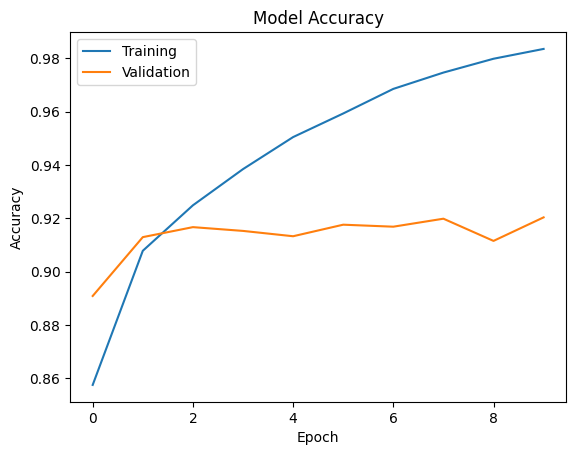

Test accuracy: 0.9158999919891357
313/313 [==============================] - 1s 2ms/step


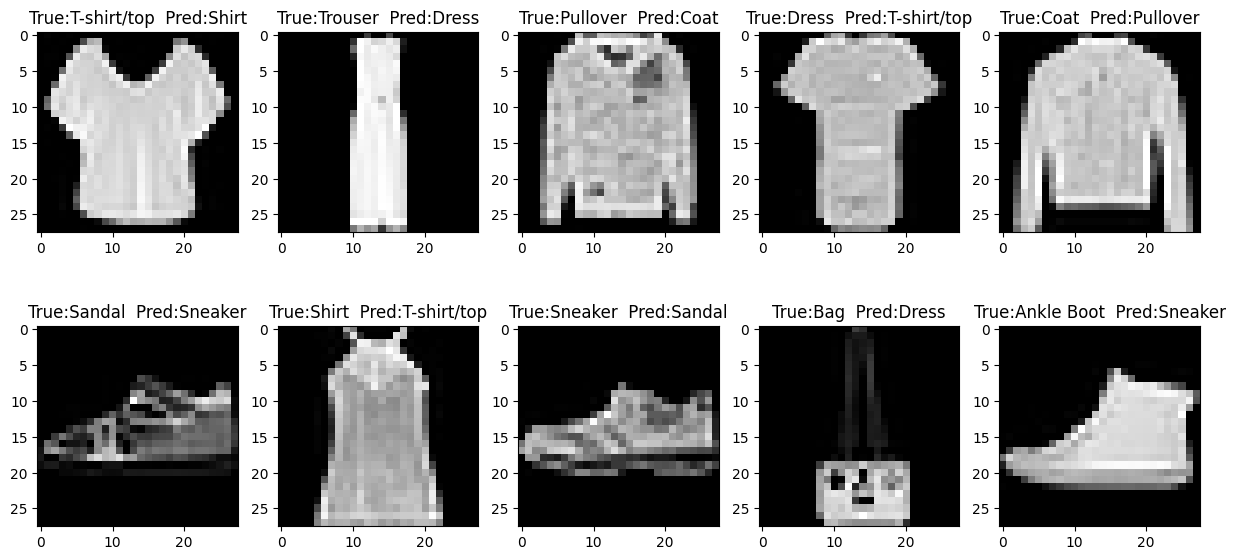

Comments: The model performs well on the task of classifying images depending on the clothing 
          category. However, its accuracy could be improved. The validation accuracy seems to plateau at around .92 
          which could suggest overfitting. Some possible ways to remedy these findings are by adding more layers or 
          increasing the length of training.


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# loading and reshaping the data
def load_dataset():
    # load dataset
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
    test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
    return train_images, train_labels, test_images, test_labels

# preparing images by normalizing the pixel values to floats between 0,1
def prep_images(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# creating the model by creating the neural network
def define_model():
    # building the convolutional neural network
    model = Sequential([
        Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
        MaxPool2D(pool_size=(2, 2), strides=1),
        Conv2D(filters=56, kernel_size=(3, 3), activation='relu'),
        Flatten(),
        Dense(56, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

    # total parameters to be trained
    print("Total parameters: ", model.count_params())
    return model

# plotting the training image accuracy and validation accuracy
def plot_accuracy(train_model):
    plt.plot(train_model.history['accuracy'])
    plt.plot(train_model.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()

# evaluating model performance
def eval_model(train_images, train_labels, test_images, test_labels):
    # creating model
    model = define_model()
    # splitting test to training and validation
    train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.2)
    # training model
    train_model = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(valid_images, valid_labels))

    # plotting the accuracy of the train and validation data during training
    plot_accuracy(train_model)

    # evaluating test accuracy and loss
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
    print('Test accuracy:', test_acc)

    # getting the test image predictions
    predicted = np.argmax(model.predict(test_images), axis=1)

    # comparing test image predictions to test labels
    incorrect = np.nonzero(predicted.reshape((-1,)) != test_labels)[0]

    return incorrect, predicted

def plot_images(data_index, predicted, test_images, test_labels):
    # Plot the sample images now
    f, ax = plt.subplots(2,5, figsize=(15,7))

    # labels for clothes categories
    labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

    # keep track of which category of image to show
    count = 0

    # enumerating through incorrect predictions and outputting images with
    # true category and predicted category
    for i, indx in enumerate(data_index[:]):
        if labels[test_labels[indx]] == labels[count]:
            ax[count//5, count%5].imshow(test_images[indx], cmap='gray')
            ax[count//5, count%5].set_title("True:{}  Pred:{}".format(labels[test_labels[indx]],labels[predicted[indx]]))
            count += 1
        if count == 10:
            break
    plt.show()

def main():
    train_images, train_labels, test_images, test_labels = load_dataset()
    train_images, test_images = prep_images(train_images, test_images)
    incorrect, predicted = eval_model(train_images, train_labels, test_images, test_labels)
    plot_images(incorrect, predicted, test_images, test_labels)
    print('''Comments: The model performs well on the task of classifying images depending on the clothing
          category. However, its accuracy could be improved. The validation accuracy seems to plateau at around .92
          which could suggest overfitting. Some possible ways to remedy these findings are by adding more layers or
          increasing the length of training. Some strengths of this model are that it correctly classifies most images
          and only has trouble when it seems like the outline of the clothing in the image more closely resembles the
          general outline of another type. The model was also able to achieve a high level of accuracy with relatively
          minimal training.''')
    return

if __name__ == "__main__":
    main()

